## O coeficiente beta: como comparar ações com o mercado local
#### https://medium.com/@cesar.vieira/o-coeficiente-beta-como-comparar-a%C3%A7%C3%B5es-com-o-mercado-local-3cd4d1230b68

## How to calculate portfolio beta in Python
#### https://www.codingfinance.com/post/2018-04-25-portfolio-beta-py/


In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
TickerA = 'LAME4.SA' #ativo A
TickerB = 'WEGE3.SA' #ativo B
TickerC = 'BRFS3.SA' #ativo C
TickerD = '^BVSP'    #mercado

tickers = [TickerA, TickerB, TickerC, TickerD]
data=pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start = '2016-1-1', end = '2019-1-1')['Adj Close']

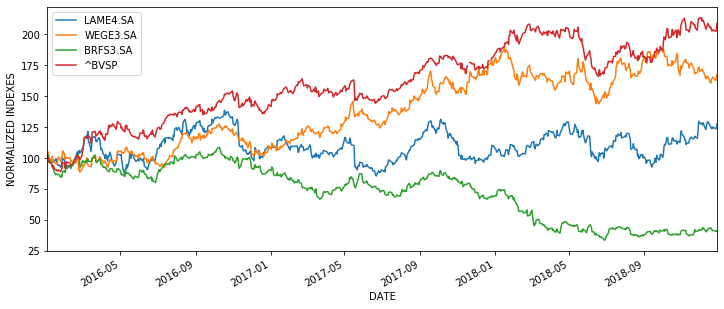

In [3]:
datanorm=data/data.iloc[0]*100
datanorm.plot(figsize=(12,5))
plt.xlabel('DATE')
plt.ylabel('NORMALIZED INDEXES')
plt.show()

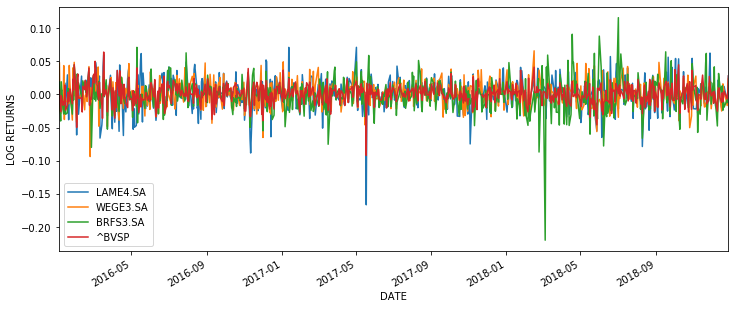

In [4]:
log_returns = np.log(data/data.shift(1))
log_returns.plot(figsize=(12,5))
plt.xlabel('DATE')
plt.ylabel('LOG RETURNS')
plt.show()

In [5]:
cov = log_returns.cov()*250             #covariância dos dados
var_m = log_returns[TickerD].var()*250  #variância do mercado

In [6]:
cov

,LAME4.SA,WEGE3.SA,BRFS3.SA,^BVSP
LAME4.SA,0.130670,0.038457,0.046683,0.054683
WEGE3.SA,0.038457,0.084170,0.028440,0.034468
BRFS3.SA,0.046683,0.028440,0.133160,0.037320
^BVSP,0.054683,0.034468,0.037320,0.052008


In [7]:
var_m

0.052008193089664076

In [8]:
Am_cov = cov.iloc[0,2]   #Am_cov : covariância('ITSA4.SA' x ^BVSP)
Bm_cov = cov.iloc[1,2]   #Bm_cov : covariância('CIEL3.SA' x ^BVSP)
A_beta = Am_cov/var_m
B_beta = Bm_cov/var_m

In [9]:
print(Am_cov," e ", A_beta)

0.04668307977300436  e  0.8976101071714023


In [10]:
print(Bm_cov , " e " , B_beta)

0.028439582611403533  e  0.5468288921780579


### How to calculate portfolio beta in Python

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from scipy import stats
import seaborn as sns

In [12]:
# Create a list of tickers and weights
tickers = ['BND', 'VB', 'VEA', 'VOO', 'VWO']
wts = [0.1,0.2,0.25,0.25,0.2]

In [21]:
price_data = web.get_data_yahoo(tickers,
                               start = '2013-01-01',
                               end = '2018-03-01')
price_data = price_data['Adj Close']
price_data.head()

Symbols,BND,VB,VEA,VOO,VWO
Date,,,,,
2013-01-02,68.903694,74.857475,28.805780,115.581253,37.326729
2013-01-03,68.698364,74.812477,28.516197,115.477432,37.105087
2013-01-04,68.805130,75.379364,28.677080,115.961922,37.170753
2013-01-07,68.755882,75.154419,28.532288,115.650497,36.850594
2013-01-08,68.821548,75.010437,28.379452,115.304459,36.546867


In [22]:
ret_data = price_data.pct_change()[1:]
port_ret = (ret_data * wts).sum(axis = 1)
ret_data.head()

Symbols,BND,VB,VEA,VOO,VWO
Date,,,,,
2013-01-03,-0.002980,-0.000601,-0.010053,-0.000898,-0.005938
2013-01-04,0.001554,0.007577,0.005642,0.004196,0.001770
2013-01-07,-0.000716,-0.002984,-0.005049,-0.002686,-0.008613
2013-01-08,0.000955,-0.001916,-0.005357,-0.002992,-0.008242
2013-01-09,-0.000358,0.004319,0.004818,0.003001,0.005840


In [28]:
benchmark_price = web.get_data_yahoo('SPY',
                               start = '2013-01-01',
                               end = '2018-03-01')
                               
benchmark_ret = benchmark_price["Adj Close"].pct_change()[1:]
benchmark_ret.head()

Date
2013-01-03   -0.002260
2013-01-04    0.004392
2013-01-07   -0.002733
2013-01-08   -0.002877
2013-01-09    0.002542
Name: Adj Close, dtype: float64

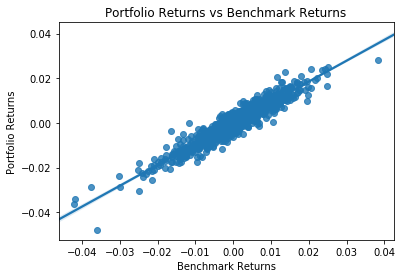

In [24]:
sns.regplot(benchmark_ret.values, port_ret.values)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()

In [25]:
(beta, alpha) = stats.linregress(benchmark_ret.values,
                port_ret.values)[0:2]
                
print("The portfolio beta is", round(beta, 4))

The portfolio beta is 0.934


In [26]:
print("The portfolio alpha is", round(alpha,5))

The portfolio alpha is -0.00016
